# Part 1: Cleaning Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma
import math

In [ ]:
df = pd.read_csv('23.csv',header=0, names=['date','UT_conf','VA_conf', 'UT_death', 'VA_death'])
df[['UT_conf','VA_conf', 'UT_death', 'VA_death']] = df[['UT_conf','VA_conf', 'UT_death', 'VA_death']].diff().fillna(0)
print(df)

           date  UT_conf  VA_conf  UT_death  VA_death
0    2020-01-22      0.0      0.0       0.0       0.0
1    2020-01-23      0.0      0.0       0.0       0.0
2    2020-01-24      0.0      0.0       0.0       0.0
3    2020-01-25      0.0      0.0       0.0       0.0
4    2020-01-26      0.0      0.0       0.0       0.0
..          ...      ...      ...       ...       ...
433  2021-03-30    371.0   1444.0       3.0      17.0
434  2021-03-31    514.0   1057.0       4.0       8.0
435  2021-04-01    487.0   1847.0       2.0      11.0
436  2021-04-02    422.0   1523.0       5.0      11.0
437  2021-04-03    447.0   1523.0       1.0       6.0

[438 rows x 5 columns]


In [ ]:
  print("Outliers")
  labels = ['UT_conf','VA_conf', 'UT_death', 'VA_death']
  for label in labels:
      print(label)
      Q1 = df[label].quantile(0.25)
      Q3 = df[label].quantile(0.75)
      IQR = Q3 - Q1
      small_outlier = df.query('{} < (@Q1 - 1.5 * @IQR)'.format(label))
      large_outlier = df.query('{} > (@Q3 + 1.5 * @IQR)'.format(label))
      if len(small_outlier) > 0:
          print('BELOW Q1')
          print(small_outlier[['date', label]])
      if len(large_outlier) > 0:
          print('ABOVE Q3')
          print(large_outlier[['date', label]])
      print()

Outliers
UT_conf
ABOVE Q3
           date  UT_conf
277  2020-10-25   3270.0
288  2020-11-05   2785.0
289  2020-11-06   2930.0
290  2020-11-07   3047.0
293  2020-11-10   2760.0
295  2020-11-12   3791.0
297  2020-11-14   5026.0
300  2020-11-17   3212.0
301  2020-11-18   3088.0
302  2020-11-19   3955.0
303  2020-11-20   4563.0
304  2020-11-21   3379.0
305  2020-11-22   3136.0
310  2020-11-27   5614.0
315  2020-12-02   3934.0
316  2020-12-03   4005.0
317  2020-12-04   3055.0
318  2020-12-05   3521.0
323  2020-12-10   3362.0
325  2020-12-12   3704.0
329  2020-12-16   2888.0
330  2020-12-17   3214.0
341  2020-12-28  15541.0
343  2020-12-30   2806.0
344  2020-12-31   4545.0
346  2021-01-02   5261.0
350  2021-01-06   3907.0
351  2021-01-07   4642.0
352  2021-01-08   3659.0
357  2021-01-13   5053.0
358  2021-01-14   2821.0

VA_conf
ABOVE Q3
           date  VA_conf
318  2020-12-05   3735.0
319  2020-12-06   3862.0
320  2020-12-07   3764.0
321  2020-12-08   3896.0
322  2020-12-09   4491.0
323  2

From the values above, we found that most of our dataset contains outliers. Initially, this was quite surprising to us and we thought something must have been done wrong. However, after looking at the COVID 19 dataset, it actually seems to be the case that these two states did indeed have outliers and both have unique ways of reporting their data.

We begin with Virginia. According to the data above, we see that January, February, and March has the majority of the death outliers in the dataset. The Virginia deaths in January seemed to have been reported sporadically, where some days there were dips (i.e. 0 deaths reported, 3 deaths reported), and then massive jumps. If you search up COVID deaths in Virginia on Google, there are a lot of articles saying Virginia had data glitches which resulted in death "data dumps" in February and March. A lot of the deaths reported in February and March included these dumps, so it makes sense that there are so many outliers in the Virginia death dataset.

Regarding the Virginia confirmed cases outliers, almost all of the outliers were in December and January. This corresponds with the winter surge in America. Interestingly enough, the data some days was also sporadic like the deaths data, where some days there were few cases and then a big spike. As the holiday season approached, there were also much lower confirmed cases on days like Christmas and New Years. This makes sense and happened not only in Virginia, but also across America. Finally, in January, there were massive spikes in data, specifically on January 17th. With these spikes also came much lower cases on preceeding on the next days, so it makes sense that we detected so many outliers for this month. Perhaps this could have something to do with the riots, election, and inauguration day since DC is nearby.

Finally, we look at the outliers for Utah. Regarding the deaths in Utah, Utah has a very jagged trend line if you search up the Utah deaths graph on Google. There are a lot of days where Utah reports few deaths, and then it jumps up. We see this in November around Thanksgiving, and also in a lot of December and January. Utah's death graph has a lot of gaps where some days there are 0 deaths and other days it jumps up, so it makes sense that so many outliers were detected for Utah.

Regarding cases in Utah, there is a similar trend too. For example, Utah reported 0 cases on Christmas and on January 1st, and then had resulting spikes the next couple of days. Perhaps this could be because Utah has a lot of Mormons and they closed all testing centers on Christmas and New Year's. The Utah cases data seems to be in general smoother than their deaths data, but there are once again days where they go from lower reporting to higher reporting. 

**Note: since there are too many outliers that were found from Tukey's Rule, we do not remove the outliers from the dataset and use the original dataset for our required inferences**

# Part 2: Required Inferences

## **A**: AR, EWMA, MSE, MAPE

### EWMA

In [ ]:
import pandas as pd

df = pd.read_csv('23.csv',header=0, names=['date','UT_conf','VA_conf', 'UT_death', 'VA_death'])
df[['UT_conf','VA_conf', 'UT_death', 'VA_death']] = df[['UT_conf','VA_conf', 'UT_death', 'VA_death']].diff().fillna(0)
df = df[(df['date'] >= '2020-08-01') & (df['date'] <= '2020-08-28')]

for alpha in [0.5, 0.8]:
    print('alpha =', alpha)

    cols = ['UT_conf', 'VA_conf', 'UT_death', 'VA_death']
    ewma = {}
    mse = {}
    mape = {}
    for col in cols:
        ewma[col] = training[col].tolist()[0]
        mse[col] = 0
        mape[col] = 0
    # Calculate EWMA for the first three weeks of august
    for i in range(1, 21):
        for col in cols:
            ewma[col] = alpha * df[col].tolist()[i] + (1 - alpha) * ewma[col]
    for i in range(7):
        print('Day 2' + str(2 + i))
        for col in cols:
            print(col, ewma[col])
            sample = df[col].tolist()[21 + i]
            # Calculate sum of squared errors
            mse[col] += (ewma[col] - sample) ** 2
            # Ignore 0 denominators
            if sample != 0:
                mape[col] += abs((sample - ewma[col]) / sample)
            # Incorporate new sample into EWMA
            ewma[col] = alpha * df[col].tolist()[21 + i] + (1 - alpha) * ewma[col]
    print()

    # Print accuracy results
    for col in cols:
        print(col, 'MSE:', mse[col] / 7.0)
        print(col, 'MAPE:', mape[col] * 100.0 / 7.0)
    print()

alpha = 0.5
Day 22
UT_conf 449.93113136291504
VA_conf 904.0607776641846
UT_death 1.498978614807129
VA_death 11.467790603637695
Day 23
UT_conf 408.4655656814575
VA_conf 1058.0303888320923
UT_death 4.7494893074035645
VA_death 9.233895301818848
Day 24
UT_conf 340.73278284072876
VA_conf 976.0151944160461
UT_death 2.3747446537017822
VA_death 16.616947650909424
Day 25
UT_conf 293.3663914203644
VA_conf 820.0075972080231
UT_death 3.187372326850891
VA_death 10.308473825454712
Day 26
UT_conf 331.1831957101822
VA_conf 912.5037986040115
UT_death 5.093686163425446
VA_death 16.654236912727356
Day 27
UT_conf 375.0915978550911
VA_conf 867.7518993020058
UT_death 4.046843081712723
VA_death 18.827118456363678
Day 28
UT_conf 376.04579892754555
VA_conf 994.3759496510029
UT_death 3.5234215408563614
VA_death 15.413559228181839

UT_conf MSE: 6868.249511866323
UT_conf MAPE: 22.56675818919756
VA_conf MSE: 46542.94135335959
VA_conf MAPE: 20.63685287536803
UT_death MSE: 12.52929166613969
UT_death MAPE: 41.8512900

There were a few days in the last week of August where there were 0 new confirmed cases which had to be ignored in the MAPE calculation.

Each day in the last week was incorporated into the prediction for the next day, which is how this analysis would be done in real time.

### AR

In [ ]:
"""AR(3) & AR(5)"""

import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
# from statsmodels.tsa.ar_model import AutoReg
# from statsmodels.tsa.stattools import adfuller
# from sklearn.metrics import mean_squared_error

file = 'https://raw.githubusercontent.com/michaelofsbu/CSE-544-Datasets/main/States%20Data/23.csv'
state = pd.read_csv(file)
state['Date'] = pd.to_datetime(state['Date'])  

aug = (state['Date'] >= '2020-08-01') & (state['Date'] <= '2020-08-31')
state_aug = state[aug]
state_aug = state_aug.reset_index()

# mean absolute percent error
def mape(actual, Predicted):
  mape = np.mean(np.abs((actual - Predicted)/actual))*100
  return mape

# mean squared error
def msev(actual, Predicted):
  mse = np.square(np.subtract(actual, Predicted)).mean()
  return mse

# Autoregression model and p as the lags value
def ar(p, df, train_size, col):
  # Add f-*p columns to dataframe
  for i in range(1, p+1):
    df['f-%d' % i] = df[col].shift(i)

  # Breaking data into training and test set and remove the null value
  train = pd.DataFrame(df[:train_size]).dropna()
  test = pd.DataFrame(df[train_size:])

  # Separate the f-*p columns as data, first column as labels
  train_data = train.iloc[:,1:].values.reshape(-1, p)
  train_label = train.iloc[:,0].values.reshape(-1, 1)
  test_data = test.iloc[:,1:].values.reshape(-1, p)

  # Running linear regression to generate the coefficents and interceptions
  lr = LinearRegression()
  lr.fit(train_data, train_label)

  # Apply the autoregression formula y(t) = intercept + Σ coef(i) * y(t-i)
  pred = test_data.dot(lr.coef_.T) + lr.intercept_
  pred = pred.flatten()

  # Compute the mse and mape value
  mse = msev(test[col], pred)
  mape_ = mape(test[col], pred)

  # Report the accuracy
  print('AR(' + str(p) + ') mape: ', round(mape_, 2), '%\tmse:', round(mse))



for col in state_aug.columns[2:]:
  # data = state_aug[col]
  data = pd.DataFrame(state_aug[col])

  print(col)
  ar(3, data, 21, col)
  ar(5, data, 21, col)
  print()

UT confirmed
AR(3) mape:  0.14 %	mse: 6014
AR(5) mape:  0.33 %	mse: 36549

VA confirmed
AR(3) mape:  0.28 %	mse: 143442
AR(5) mape:  0.48 %	mse: 366682

UT deaths
AR(3) mape:  0.71 %	mse: 9
AR(5) mape:  0.8 %	mse: 13

VA deaths
AR(3) mape:  0.66 %	mse: 351
AR(5) mape:  0.5 %	mse: 244



## **B**: Wald's test, Z test, and t-test

### Wald's One Sample

In [ ]:
import pandas as pd
import numpy as np

state = pd.read_csv('23.csv')

state['Date'] = pd.to_datetime(state['Date'])  
february = (state['Date'] >= '2021-02-01') & (state['Date'] <= '2021-02-28')
march = (state['Date'] >= '2021-03-01') & (state['Date'] <= '2021-03-31')

state_feb = state[february]
state_march = state[march]

cases_VA_feb = state_feb[['Date', 'VA confirmed']]
cases_count_VA_feb = cases_VA_feb['VA confirmed']

deaths_VA_feb = state_feb[['Date', 'VA deaths']]
deaths_count_VA_feb = deaths_VA_feb['VA deaths']

cases_UT_feb = state_feb[['Date', 'UT confirmed']]
cases_count_UT_feb = cases_UT_feb['UT confirmed']

deaths_UT_feb = state_feb[['Date', 'UT deaths']]
deaths_count_UT_feb = deaths_UT_feb['UT deaths']

cases_VA_mar = state_march[['Date', 'VA confirmed']]
cases_count_VA_mar = cases_VA_mar['VA confirmed']

deaths_VA_mar = state_march[['Date', 'VA deaths']]
deaths_count_VA_mar = deaths_VA_mar['VA deaths']

cases_UT_mar = state_march[['Date', 'UT confirmed']]
cases_count_UT_mar = cases_UT_mar['UT confirmed']

deaths_UT_mar = state_march[['Date', 'UT deaths']]
deaths_count_UT_mar = deaths_UT_mar['UT deaths']

In [ ]:
def walds_one(feb, march):
  #Here we are using Poisson MLE. 
  #The MLE for Poisson is simply the sample mean, so we just take the mean
  theta_hat = np.mean(feb)

  #We were told to use sample mean for theta_0
  theta_0 = np.mean(march)

  #se = sqrt(theta_hat / n)
  se = np.sqrt(theta_hat / len(march))
  
  #Compute Wald's statistic
  walds_statistic = (theta_hat - theta_0) / se

  #Critical threshold for alpha = 0.05 is 1.96
  if np.abs(walds_statistic) > 1.96:
    print("|W| = ", np.abs(walds_statistic), " > 1.96, therefore reject the Null Hypothesis")
  else:
    print("|W| = ", np.abs(walds_statistic), " <= 1.96, therefore accept the Null Hypothesis")

walds_one(deaths_count_UT_feb, deaths_count_UT_mar)

walds_one(cases_count_UT_feb, cases_count_UT_mar)

walds_one(cases_count_VA_feb, cases_count_VA_mar)

walds_one(deaths_count_VA_feb, deaths_count_VA_mar)

|W| =  31.172891168763257  > 1.96, therefore reject the Null Hypothesis
|W| =  169.5916851488749  > 1.96, therefore reject the Null Hypothesis
|W| =  386.3680317489496  > 1.96, therefore reject the Null Hypothesis
|W| =  181.22032132577195  > 1.96, therefore reject the Null Hypothesis


In all of these cases the Wald's statistic W was much greater than the threshold value of 1.96. Based off of this, we can say the following:

For Virginia values, the mean number of cases AND the mean of daily deaths for Feb’21 **is different** from the corresponding mean of daily values for March’21

For Utah values, the mean number of cases AND the mean of daily deaths for Feb’21 **is different** from the corresponding mean of daily values for March’21

It seems that in this case, the Wald's test is **NOT** applicable for this test. Wald's test assumes that the estimator theta_hat is AN, but in this case, the data is not AN.

### Z test one sample

In [ ]:
def z_one(original, feb, march):
  #Z test requires true standard deviation, so we need to find that
  sigma = np.std(original)

  
  x_bar = np.mean(feb)
  
  mu_0 = np.mean(march)

  sigma_over_sqrtn = sigma / np.sqrt(len(feb))

  z_statistic = (x_bar - mu_0) / sigma_over_sqrtn

  if np.abs(z_statistic) > 1.96:
    print("|Z| = ", np.abs(z_statistic), "> 1.96 therefore reject the null hypothesis")
  else:
    print("|Z| = ", np.abs(z_statistic), "<= 1.96 therefore accept the null hypothesis")

z_one(state['VA confirmed'], cases_count_VA_feb, cases_count_VA_mar)

z_one(state['VA deaths'], deaths_count_VA_feb, deaths_count_VA_mar)

z_one(state['UT confirmed'], cases_count_UT_feb, cases_count_UT_mar)

z_one(state['UT deaths'], deaths_count_UT_feb, deaths_count_UT_mar)

|Z| =  1.371705720445352 <= 1.96 therefore accept the null hypothesis
|Z| =  5.108579550253789 > 1.96 therefore reject the null hypothesis
|Z| =  0.7020619767080907 <= 1.96 therefore accept the null hypothesis
|Z| =  1.8576534274536443 <= 1.96 therefore accept the null hypothesis


In the case of mean monthly cases for Utah, and the case of mean monthly deaths for Utah and Virginia, here sinze |Z| <= 1.96, we accept the null hypothesis. That means that it is indeed true that the means are the same in February and March for these.

One exception to this is the mean monthly deaths in Virginia. Our Z value here was 5.11 which is greater than the critical threshold, so here we reject the null hyopthesis and claim that the means are not the same. 

We believe that the Z test is not applicable here. One of the criteria for the Z test is knowing the **true** standard deviation. However, as we see in the news and social media all the time, it seems that the true standard deviation of COVID cases can never really be known. This is because there is indeed a lot of asymptomatic cases which do not show up in the numbers, some false negatives, mistakes in testing like PCR thresholds, and finally people just simply refusing to get tested. These could all be contributing factors to now knowing the true standard deviation, so in this case, the Z test is not really applicable since it assumes we know the true standard deviation.  

### Wald's 2 sample

In [ ]:
def walds_two(feb, march):
  x_bar = np.mean(feb)
  y_bar = np.mean(march)
  delta_hat = x_bar - y_bar

  #Since we're using Poisson MLE, variance will be sample mean
  
  se_hat = np.sqrt((x_bar / len(feb)) + (y_bar / len(march)))

  walds_statistic = delta_hat / se_hat

  if np.abs(walds_statistic) > 1.96:
    print("|W| = ", np.abs(walds_statistic), " > 1.96, therefore reject the Null Hypothesis")
  else:
    print("|W| = ", np.abs(walds_statistic), " <= 1.96, therefore accept the Null Hypothesis")

walds_two(cases_count_UT_feb, cases_count_UT_mar)

walds_two(deaths_count_UT_feb, deaths_count_UT_mar)

walds_two(cases_count_VA_feb, cases_count_VA_mar)

walds_two(deaths_count_VA_feb, deaths_count_VA_mar)

|W| =  115.44969347830576  > 1.96, therefore reject the Null Hypothesis
|W| =  20.83218579296163  > 1.96, therefore reject the Null Hypothesis
|W| =  260.4310819769535  > 1.96, therefore reject the Null Hypothesis
|W| =  114.81653434010379  > 1.96, therefore reject the Null Hypothesis


Similarly to the one sample Wald's test, in all of these cases the Wald's statistic W was much greater than the threshold value of 1.96. Based off of this, we can say the following:

For Virginia values, the mean number of cases AND the mean of daily deaths for Feb’21 **is different** from the corresponding mean of daily values for March’21

For Utah values, the mean number of cases AND the mean of daily deaths for Feb’21 **is different** from the corresponding mean of daily values for March’21

It seems that in this case, the 2 sample Wald's test is **NOT** applicable for this. Wald's test assumes that the estimator theta_hat is AN, but in this case, the data is not AN.

### t-test one sample

In [ ]:
def t_one(feb, march):
  x_bar = np.mean(feb)
  mu_0 = np.mean(march)

  ssd = np.std(feb)

  s_over_n = ssd / np.sqrt(len(feb))
  t = (x_bar - mu_0) / s_over_n
  #Critical threshold 2.051831 found by table lookup 
  if np.abs(t) > 2.051831:
    print("|t| = ", np.abs(t), "> 2.051831 therefore reject the null hypothesis")
  else:
    print("|t| = ", np.abs(t), "<= 2.051831 therefor accept the null hypothesis")

t_one(cases_count_UT_feb, cases_count_UT_mar)

t_one(deaths_count_UT_feb, deaths_count_UT_mar)

t_one(cases_count_VA_feb, cases_count_VA_mar)

t_one(deaths_count_VA_feb, deaths_count_VA_mar)


|t| =  13.711719528357026 > 2.051831 therefore reject the null hypothesis
|t| =  17.85120765089191 > 2.051831 therefore reject the null hypothesis
|t| =  13.113863589190032 > 2.051831 therefore reject the null hypothesis
|t| =  26.739252053774308 > 2.051831 therefore reject the null hypothesis


In all of these cases the t statistic T was greater than the threshold value of 2.051831. Based off of this, we can say the following:

For Virginia values, the mean number of cases AND the mean of daily deaths for Feb’21 **is different** from the corresponding mean of daily values for March’21

For Utah values, the mean number of cases AND the mean of daily deaths for Feb’21 **is different** from the corresponding mean of daily values for March’21

It seems that in this case, the T test is **NOT** applicable for this test. T test assumes that the data is normally distributed, and we do not know that. 

### Two sample unpaired t-test

In [ ]:
def t_two_unpaired(feb, march):
  x_bar = np.mean(feb)
  y_bar = np.mean(march)
  d_bar = x_bar - y_bar

  sx = np.var(feb) / len(feb)
  sy = np.var(march) / len(march)
  sx_sy = np.sqrt(sx + sy)

  t = d_bar / sx_sy
  #Critical threshold found from table lookup
  if np.abs(t) > 2.002465:
    print("|t| = ", np.abs(t), "> 2.002465 therefore reject the null hypothesis")
  else:
    print("|t| = ", np.abs(t), "<= 2.002465 therefore reject the null hypothesis")

t_two_unpaired(cases_count_UT_feb, cases_count_UT_mar)

t_two_unpaired(deaths_count_UT_feb, deaths_count_UT_mar)

t_two_unpaired(cases_count_VA_feb, cases_count_VA_mar)

t_two_unpaired(deaths_count_VA_feb, deaths_count_VA_mar)


|t| =  11.910784809405355 > 2.002465 therefore reject the null hypothesis
|t| =  14.159815154650781 > 2.002465 therefore reject the null hypothesis
|t| =  11.357687622323128 > 2.002465 therefore reject the null hypothesis
|t| =  21.770162931599856 > 2.002465 therefore reject the null hypothesis


In all of these cases the t statistic T was greater than the threshold value of 2.002465. Based off of this, we can say the following:

For Virginia values, the mean number of cases AND the mean of daily deaths for Feb’21 **is different** from the corresponding mean of daily values for March’21

For Utah values, the mean number of cases AND the mean of daily deaths for Feb’21 **is different** from the corresponding mean of daily values for March’21

It seems that in this case, the 2 sample unpaired T test is **NOT** applicable for this test. T test assumes that the data samples for X and Y are normally distributed, and we do not know that. 

## **C**: KS and Permutation

### Two Sample KS test

Confirmed:
Ks_2sampResult(statistic=0.16304347826086957, pvalue=0.1736682169213413)


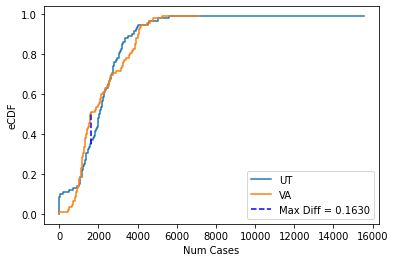

Deaths:
Ks_2sampResult(statistic=0.33695652173913043, pvalue=5.0189303748185584e-05)


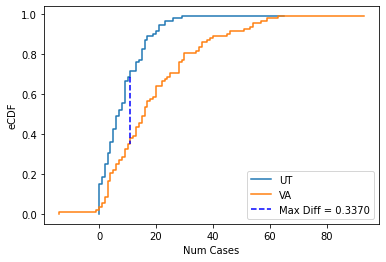

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bisect import bisect_left, bisect_right
from scipy import stats
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

def plot_ecdf(S, label):
    x = np.sort(S)
    y = np.arange(len(x))/float(len(x))
    plt.step(x, y, label=label)
    return x, y

def ks_2_sample(X, Y):
    x1, y1 = plot_ecdf(X, 'UT')
    x2, y2 = plot_ecdf(Y, 'VA')

    data_all = np.concatenate([x1, x2])
    # using searchsorted solves equal data problem
    n1, n2 = len(x1), len(x2)
    idx1 = np.searchsorted(x1, data_all, side='right')
    idx2 = np.searchsorted(x2, data_all, side='right')
    cdf1 = idx1 / n1
    cdf2 = idx2 / n2
    cddiffs = cdf1 - cdf2
    minS = np.clip(-np.min(cddiffs), 0, 1)
    maxS = np.max(cddiffs)
    if minS > maxS:
        val = minS
        idx = np.argmin(cddiffs)
    else:
        val = maxS
        idx = np.argmax(cddiffs)
    maxdiff_x = x1[idx1[idx]]
    plt.plot((maxdiff_x,maxdiff_x),(y1[idx1[idx]],y2[idx2[idx]]), 'b--', label='Max Diff = {:.4f}'.format(val))
    plt.legend()
    plt.xlabel('Num Cases')
    plt.ylabel('eCDF')
    plt.show()

def run_part_c(X, Y):
    print(stats.ks_2samp(X, Y))
    ks_2_sample(X, Y)

def main():
    df = pd.read_csv('23.csv',header=0, names=['date','UT_conf','VA_conf', 'UT_death', 'VA_death'])
    start_idx = df[df['date'] == '2020-09-30'].index[0]
    end_idx = df[df['date'] == '2020-12-31'].index[0] + 1
    filtered_df = df[start_idx:end_idx]
    filtered_df[['UT_conf','VA_conf', 'UT_death', 'VA_death']] = filtered_df[['UT_conf','VA_conf', 'UT_death', 'VA_death']].diff()
    filtered_df = filtered_df[1:]

    # for confirmed
    print("Confirmed:")
    X, Y = map(list, zip(*filtered_df[['UT_conf', 'VA_conf']].values))
    run_part_c(X, Y)

    # for deaths
    print("Deaths:")
    X, Y = map(list, zip(*filtered_df[['UT_death', 'VA_death']].values))
    run_part_c(X, Y)

main()



Our null hypotheses is that the distribution for UT and VA are the same for confirmed and deaths respectively for the two graphs above.

From the 2-sample KS test above, we see that for the confirmed cases, we see a p-value of 0.174 which is greater than 0.05. Thus, we cannot reject the null, and we maintain that the UT and VA confirmed cases are distributed the same.

For deaths, we find that the p-value is very close to zero. Thus, we can reject the null, and the UT and VA deaths are distributed differently.

### One Sample KS Test

No handles with labels found to put in legend.


Confirmed
Poisson D statistic:  0.569909148988736
P-value:  8.771987309017859e-29
Geometric D statistic:  0.2397119300394826
P-value:  3.887160419432116e-05


No handles with labels found to put in legend.


Binomial D statistic:  0.5978260869565217
P-value:  6.04716768035127e-32

Deaths
Poisson D statistic:  0.5437734002096557
P-value:  5.066266734407831e-26
Geometric D statistic:  0.3996676497550304
P-value:  8.964128524963551e-14
Binomial D statistic:  0.7173913043478262
P-value:  1.8193584181125665e-48



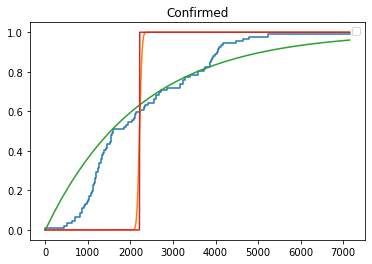

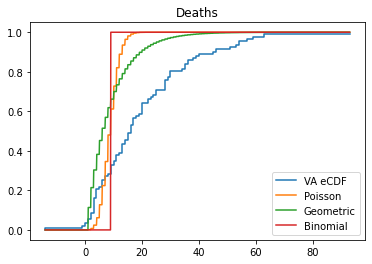

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from scipy.stats import binom
from scipy.stats import geom
from scipy.stats import poisson
from scipy.stats import ksone
from scipy.stats import kstest

def plot_ecdf(S, label):
    x = np.sort(S)
    y = np.arange(len(x))/float(len(x))
    plt.legend()
    plt.step(x, y, label=label)
    return x, y

df = pandas.read_csv('23.csv',header=0, names=['date','UT_conf','VA_conf', 'UT_death', 'VA_death'])
df[['UT_conf','VA_conf', 'UT_death', 'VA_death']] = df[['UT_conf','VA_conf', 'UT_death', 'VA_death']].diff().fillna(0)

# Filter October through December
ks_df = df[(df['date'] >= '2020-10-01') & (df['date'] <= '2020-12-31')]

# Split the data up by column into numpy lists
UT_confirmed = np.array(ks_df['UT_conf'].tolist())
VA_confirmed = np.array(ks_df['VA_conf'].tolist())
UT_deaths = np.array(ks_df['UT_death'].tolist())
VA_deaths = np.array(ks_df['VA_death'].tolist())

for label, UT, VA in [('Confirmed', UT_confirmed, VA_confirmed), ('Deaths', UT_deaths, VA_deaths)]:
    print(label)
    # Sort the data for the CDFs
    UT = np.sort(UT)
    VA = np.sort(VA)
    x = np.linspace(min(VA), max(VA), num=1000)
    
    # Plot VA eCDF
    plt.figure(1 if label == 'Confirmed' else 4)
    plt.title(label)
    plot_ecdf(VA, 'VA eCDF')

    # Vectorize Poisson cdf.
    # MME estimate of lambda is the mean of the
    # UT data points
    poisson_cdf = lambda k: poisson.cdf(k, np.mean(UT))
    poisson_cdf = np.vectorize(poisson_cdf)
    # Evaluate Poisson cdf at state VA data points
    y = poisson_cdf(VA)
    diff1 = max(np.abs(y - np.arange(len(VA))/float(len(VA))))
    diff2 = max(np.abs(y - (np.arange(len(VA)) + 1)/float(len(VA))))
    # Calculate D-statistic for KS test
    D = max(diff1, diff2)
    print('Poisson D statistic: ', D)
    print('P-value: ', 2 * ksone.sf(D, len(VA)))
    plt.plot(x, poisson_cdf(x), label='Poisson')

    # Vectorize Geometric cdf.
    # MME estimate of lambda is 1 / the mean of the
    # UT data points
    geom_cdf = lambda k: geom.cdf(k, 1.0 / np.mean(UT))
    geom_cdf = np.vectorize(geom_cdf)
    y = geom_cdf(VA)
    diff1 = max(np.abs(y - np.arange(len(VA))/float(len(VA))))
    diff2 = max(np.abs(y - (np.arange(len(VA)) + 1)/float(len(VA))))
    # Calculate D-statistic for KS test
    D = max(diff1, diff2)
    print('Geometric D statistic: ', D)
    print('P-value: ', 2 * ksone.sf(D, len(VA)))
    plt.plot(x, geom_cdf(x), label='Geometric')

    # Calculate MME estimates of n and p
    p = 1 - (np.sum(UT - np.mean(UT)) ** 2) / np.sum(UT)
    n = round(np.mean(UT) / p)
    # Vectorize Binomial cdf.
    binom_cdf = lambda k: binom.cdf(k, n, p)
    binom_cdf = np.vectorize(binom_cdf)
    y = binom_cdf(VA)
    diff1 = max(np.abs(y - np.arange(len(VA))/float(len(VA))))
    diff2 = max(np.abs(y - (np.arange(len(VA)) + 1)/float(len(VA))))
    # Calculate D-statistic for KS test
    D = max(diff1, diff2)
    print('Binomial D statistic: ', D)
    print('P-value: ', 2 * ksone.sf(D, len(VA)))
    plt.plot(x, binom_cdf(x), label='Binomial')
    print()
plt.legend()
plt.show()

The null hypothesis is that the distributions are the same. For both confirmed cases and deaths, the Utah MME CDFs are quite different from the Virginia eCDF. This is unsurprising because the total population of Virginia is more than twice that of Utah.

The p-values are extremely small, and with a significance level of 0.05, the null hypothesis is rejected for all six cases.

### Permutation Test

In [ ]:
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

def run_permutation_test(X, Y, NUM_PERM):
    X_mean = np.mean(X)
    Y_mean = np.mean(Y)
    observed_diff = abs(X_mean - Y_mean)

    count = 0
    all_levels = X + Y
    for _ in range(NUM_PERM):
        np.random.shuffle(all_levels)
        g1 = all_levels[:len(X)]
        g2 = all_levels[len(X):]
        diff = abs(np.mean(g1) - np.mean(g2))
        if diff > observed_diff:
            count += 1

    return observed_diff, count, NUM_PERM, count / NUM_PERM

In [ ]:
def run_part_c(X, Y):
    observed_diff, count, num_perm, ratio = run_permutation_test(X, Y, 1000)
    print("Number of more extreme permutations: ", count)
    print("Total permutations: ", num_perm)
    print("Ratio: ", ratio)
    print()

def main():
    df = pd.read_csv('23.csv',header=0, names=['date','UT_conf','VA_conf', 'UT_death', 'VA_death'])
    start_idx = df[df['date'] == '2020-09-30'].index[0]
    end_idx = df[df['date'] == '2020-12-31'].index[0] + 1
    filtered_df = df[start_idx:end_idx]
    filtered_df[['UT_conf','VA_conf', 'UT_death', 'VA_death']] = filtered_df[['UT_conf','VA_conf', 'UT_death', 'VA_death']].diff()
    filtered_df = filtered_df[1:]
    # print(filtered_df)

    # for confirmed
    print("Confirmed:")
    X, Y = map(list, zip(*filtered_df[['UT_conf', 'VA_conf']].values))
    run_part_c(X, Y)

    # for deaths
    print("Deaths:")
    X, Y = map(list, zip(*filtered_df[['UT_death', 'VA_death']].values))
    run_part_c(X, Y)

main()


Confirmed:
Number of more extreme permutations:  930
Total permutations:  1000
Ratio:  0.93

Deaths:
Number of more extreme permutations:  0
Total permutations:  1000
Ratio:  0.0



From above, we see that for confirmed cases, 0.93 of the permutations had differences in the mean above the original observed difference. Since this is greater than 0.05, we cannot reject the null hypothesis that the UT and VA confirmed cases follow the same distribution.

For number of deaths, we see that *none* of the permuations has more extreme means and since 0 is below our threshold of 0.05, we can reject the null hypothesis and claim that the death distribution of UT and VA are not the same.

## **D**: MAP/Bayesian

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import gamma
import math

MAP for iteration 1 is 19.349614395886892, average deaths 19.571428571428573
MAP for iteration 2 is 20.251928020565554, average deaths 20.285714285714285
MAP for iteration 3 is 17.645244215938305, average deaths 17.666666666666668
MAP for iteration 4 is 16.34190231362468, average deaths 16.357142857142858


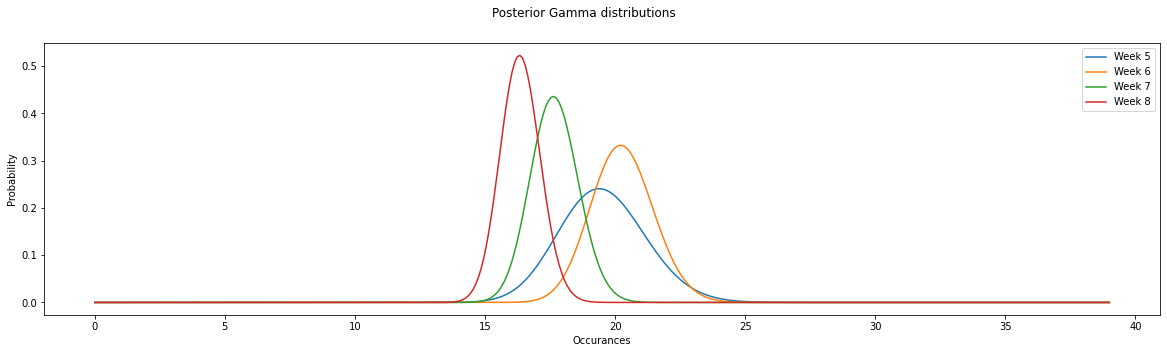

In [ ]:
start_date = '2020-06-01'
df['total_deaths'] = df['UT_death'] + df['VA_death']
# deaths_per_day = df[df['date'] > start_date]

deaths_per_day = df[df['date'] >= start_date]['total_deaths']
x_range = math.ceil(max(deaths_per_day) /10)
x_axis = np.linspace(0,x_range, x_range*10)
fig = plt.figure(figsize=(20,5))
fig.suptitle('Posterior Gamma distributions')

sead = 28
initial_sample = deaths_per_day[:sead]
beta = np.mean(initial_sample)
step = 7

# calculating posterior gamma distribution for 4 iterations 
for i in range(1,5):
    # posterior params calculations
    lambda_posterior = 1.0/(i*step + 1.0/beta)
    a_posterior = np.sum(deaths_per_day[sead : sead + i*step]) + 1
    beta = np.mean(deaths_per_day[sead:sead + i*step])

    # y-axis calculations
    y_axis = gamma.pdf(x_axis, a=a_posterior, scale=lambda_posterior)

    # picking map as the x-cordinate with max probability
    map = x_axis[np.argmax(y_axis)]
    
    avg_deaths = np.mean(deaths_per_day[sead : sead + i*step])
    print("MAP for iteration {} is {}, average deaths {}".format(i, map, avg_deaths))
    
    plt.plot(x_axis, y_axis, label='Week {}'.format(i+4))

plt.xlabel('Occurances')
plt.ylabel('Probability')
plt.legend()
plt.show()


As we see in the plot above, as we increase in iterations, the plots move to the left since the number of deaths are decreasing over time in this data range. 

#Part 3: Exploratory Task

In this exploratory section, we are working with USDA dairy datasets. We are using one main USDA dairy dataset, and then an accompanying dataset that goes into detail about the pricing of the items mentioned in the dairy dataset.

## **Exploratory 1:** The baking craze and COVID cases in USA

During COVID-19, a lot of Americans took up baking as a hobby. Facebook, Instagram, and Twitter were all flooded with pictures of baked bread, croissants, cookies, and cakes. This led to the "Quarantine 15" meme where people claimed they gained 15 lbs from the excess of lockdown cooking and carbs. 

We are wondering whether the United States surge in COVID-19 had any affect on the sale of dairy products during this time, especially since so many people took up baking as a hobby. We are using the USDA Dairy Glance dataset, which includes various dairy product statistics from January 2020 to March 2021.

Our first hypothesis is as follows: Did the surge in COVID-19 cases lead to an  increase in butter output? Dairy products are a staple for many baked goods, so we hypothesize that this baking craze could have led to an increase in butter output from farmers. 

Here, we apply Pearson's correlation to see if monthly milk and butter output are correlated with monthly cumulative US covid cases

Ho: Butter output from January to June and cumulative monthly USA covid cases from January to June are **not correlated** 

H1: Butter output from January to June and cumulative monthly USA covid cases from January to June **are correlated**

In [3]:
import pandas as pd
import numpy as np
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

butter = pd.read_csv('butter.csv')
file = 'https://raw.githubusercontent.com/michaelofsbu/CSE-544-Datasets/main/US-all/US_confirmed.csv'
us = pd.read_csv(file)

us = us.T.drop("State")

us.index = pd.to_datetime(us.index)

us['cumulative'] = us.sum(axis=1)

us['cumulative'] = us['cumulative'].diff()

us['cumulative'][0] = 8

us = us[["cumulative"]]

us = us[(us.index >= '2020-01-22') & (us.index <= '2020-12-31')]

us = us.groupby(us.index.month).sum()

us[(us.index == 1)]

us = us[(us.index == 1) | (us.index == 2) | (us.index == 3) | (us.index == 4) | (us.index == 5) | (us.index == 6) ]

butter = butter.iloc[0:6]

butter_xbar = butter['Butter Output'].mean()

cases_ybar = us['cumulative'].mean()

butter_output = np.array(butter['Butter Output'])
cases_cumulative = np.array(us['cumulative'])

numerator = 0
x_sum_denominator = 0
y_sum_denominator = 0
for i in range(len(butter_output)):
  x = butter_output[i] - butter_xbar
  y = cases_cumulative[i] - cases_ybar
  numerator += x * y

  x_sum_denominator += x**2
  y_sum_denominator += y**2

print(abs(numerator / np.sqrt(x_sum_denominator * y_sum_denominator)))



0.2010300471679496


Based off of the Pearson correlation score, since the value is 0.201 and |0.201| is < 0.5, we accept the null hypothesis that butter output from January to June and Cumulative USA covid cases from January to June are **not** correlated. This test is practical for dairy producers or dairy companies to see if there are any correlations with their product and certain events taking place. With this information, producers could fine tune their output or production levels based off of events in the world or market, and then output appropriately. A great example of this is in the very beginning of the COVID pandemic in America. Around March and April, there were news stories and videos of dairy farmers dumping hundreds of gallons of milk because they produced too much. If these dairy farmers knew that COVID cases were not correlated with dairy output, then perhaps they could have saved thousands of gallons of milk and not overproduced. 

One of the shortcomings of this test is the short time frame and lack of larger samples. Since we were only interested in January to June, which corresponds to months that have low COVID cases, COVID peaks, and then a decline in cases, our test is quite limited in this aspect. However, we think it is still an interesting idea. Sadly the USDA did not have weekly dairy data output that we know of because if it did we could have fine tuned our test more and gotten more samples.

##**Exploratory 2:** Gym bros, quarantine, and protein shakes!

With COVID lockdowns came a lack of gyms and the infamous "at home workouts", which a lot of people seem to have grown absolutely sick of. What goes hand in hand with gyms being open? Whey protein shakes. Every "gym bro" goes around with their protein shakes after a workout, and during COVID, we think not that many people bought protein due to the lack of gyms. Thankfully for us, the USDA has data on dry whey protein prices. We are curious if the prices of whey protein follow the same distribution as monthly cumulative COVID cases. This is very interesting because we hypothesize that they could be similarly distributed. In other words, when COVID cases were higher, such as in March/April 2020 or in the winter surge of 2020, states either fully shut down gyms or had severe capacity restrictions, so perhaps whey protein prices followed a similar trend, where prices either decreased due to lower demand, or increased due to higher demand. Our hypothesis is as follows:

**H0**: The distribution of monthly dry whey protein prices from January-December 2020 is the same as the distribution of monthly COVID 19 cases from January-December 2020

**H1**: The distribution of monthly dry whey protein prices from January-December 2020 is **not** the same as the distribution of monthly COVID 19 cases from January-December 2020

**(Note: this data was in pdf format, so we had to manually enter the values)**

In [4]:
import pandas as pd
import numpy as np
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
file = 'https://raw.githubusercontent.com/michaelofsbu/CSE-544-Datasets/main/US-all/US_confirmed.csv'
us = pd.read_csv(file)

us = us.T.drop("State")

us.index = pd.to_datetime(us.index)

us['cumulative'] = us.sum(axis=1)

us['cumulative'] = us['cumulative'].diff()

us['cumulative'][0] = 8

us = us[["cumulative"]]

us = us[(us.index >= '2020-01-22') & (us.index <= '2020-12-31')]

us = us.groupby(us.index.month).sum()
us = us[(us.index == 1) | (us.index == 2) | (us.index == 3) | (us.index == 4) | (us.index == 5) | (us.index == 6) | (us.index == 7) | (us.index == 8) | (us.index == 9) | (us.index == 10) | (us.index == 11) | (us.index == 12)]

whey_prices = pd.read_csv('drywhey.csv')

whey_prices.index = np.arange(1, len(whey_prices) + 1)

whey_prices = whey_prices.drop("Month", axis=1)

In [ ]:
from sklearn.preprocessing import  MinMaxScaler
scaler = MinMaxScaler()

whey_price = np.sort(np.array(whey_prices['Price'])) 
us_cases = np.sort(np.array(us['cumulative']))
# Use a MinMax scaler to scale data. Since the cases numbers are so high compared to the protein prices, we must scale our data appropriately to see anything meaningful
w_normalized = scaler.fit_transform(whey_price.reshape(-1,1)).reshape(1,-1).flatten()
us_normalized = scaler.fit_transform(us_cases.reshape(-1,1)).reshape(1,-1).flatten()

def plot_ecdf(S, label):
    x = np.sort(S)
    y = np.arange(len(x))/float(len(x))
    plt.step(x, y, label=label)
    return x, y

def ks_2_sample(X, Y):
    x1, y1 = plot_ecdf(X, 'Whey Protein Prices')
    x2, y2 = plot_ecdf(Y, 'US Monthly Cases')

    data_all = np.concatenate([x1, x2])
    # using searchsorted solves equal data problem
    n1, n2 = len(x1), len(x2)
    idx1 = np.searchsorted(x1, data_all, side='right')
    idx2 = np.searchsorted(x2, data_all, side='right')
    cdf1 = idx1 / n1
    cdf2 = idx2 / n2
    cddiffs = cdf1 - cdf2
    minS = np.clip(-np.min(cddiffs), 0, 1)
    maxS = np.max(cddiffs)
    if minS > maxS:
        val = minS
        idx = np.argmin(cddiffs)
    else:
        val = maxS
        idx = np.argmax(cddiffs)
    maxdiff_x = x1[idx1[idx]]
    plt.plot((maxdiff_x,maxdiff_x),(y1[idx1[idx]],y2[idx2[idx]]), 'b--', label='Max Diff = {:.4f}'.format(val))
    plt.legend()
    plt.xlabel('Num Cases')
    plt.ylabel('eCDF')
    plt.show()

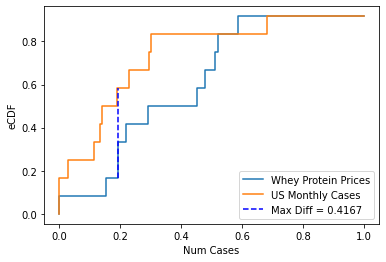

In [ ]:
ks_2_sample(w_normalized, us_normalized)

Based off of the KS test, we can see that the maximum difference between the eCDFs of whey protein prices and scaled US cumulative cases is 0.4167. Therefore, since 0.4167 > .2604 *(used table lookup for KS with n = m + n = 24)* , we reject the null hypothesis that monthly whey protein prices and monthly cumulative COVID 19 cases are distributed the same. Since the KS test has no assumptions, it is practical and useful for this dataset because we have no idea how these prices are distributed. 

We think that this inference is practical because it shows us whether COVID 19 has had an effect on protein prices, and if the affect fluctuates periodically based on COVID cases. In our case, it turns out that they were not distributed the same way, so monthly COVID-19 cases did not have an affect on protein prices, to our disappointment.

However, perhaps a protein company such as Optimum Nutrition or MyProtein could use a test like this to see what really is distributed the same as the protein prices. For example, a company could go into deeper granularity and see that California protein prices could be low since they have the strictest COVID restrictions, and see if that follows the same distribution as COVID cases. If the prices do indeed follow the same distribution, then they could tune output and production for each state based on the state level data.

Unrelated to this, but also a cool future idea would be using a KS test to see if the distribution of post COVID gym membership numbers and protein prices follow the same distribution.

##**Exploratory 3:** Wisconsin cheese in relation to COVID

With the rollout of COVID vaccines, dry ice has been in demand for the preservation of these vaccines. However, dry ice is also crucial for the production and delivery of dairy products, and Wisconsin cheese farmers have requested to safeguard supplies of dry ice for this reason. This is one of many factors that could have influenced the price of cheese in Wisconsin during the past year of the pandemic. With more people staying at home and less willing to explore the markets, cheese could be an appealing product that can last a long time in one's kitchen.

We wanted to explore if there was a relation between cheese prices in Wisconsin compared to COVID cases in Wisconsin. To do so, we use data from the USDA on prices of multiple variety of cheeses.

Here, we apply Pearson's correlation and 2-sample KS test to see if monthly cheese prices are correlated with monthly cumulative Wisconsin covid cases.

**H0**: The distibution of various cheese prices from January-December 2020 is the same as the distribution of monthly Wisconsin COVID 19 cases from January-December 2020

**H1**: The distibution of various cheese prices from January-December 2020 is **not** the same as the distribution of monthly Wisconsin COVID 19 cases from January-December 2020

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

PROCESS AMERICAN 5 POUND LOAF
0.26920390276953043

BRICK AND/OR MUENSTER 5 POUNDS
0.30282344836664515

CHEDDAR 40 POUND BLOCK
0.3028234483666451

MONTEREY JACK 10 POUNDS
0.302823448366645

BLUE 5 POUNDS
0.30282344836664504

MOZZARELLA 5-6 POUNDS
0.30282344836664526

SWISS 6-9 POUND CUTS
0.4277729127467491

PROCESS AMERICAN 5 POUND LOAF


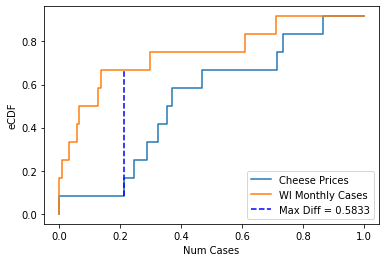


BRICK AND/OR MUENSTER 5 POUNDS


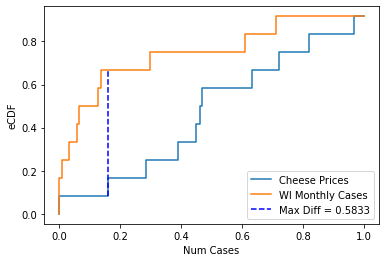


CHEDDAR 40 POUND BLOCK


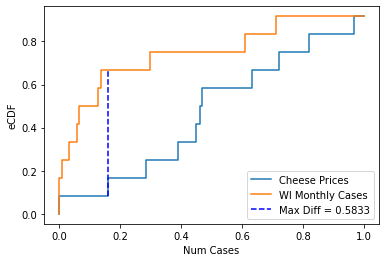


MONTEREY JACK 10 POUNDS


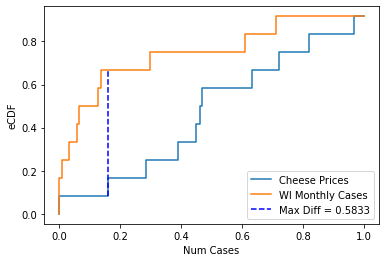


BLUE 5 POUNDS


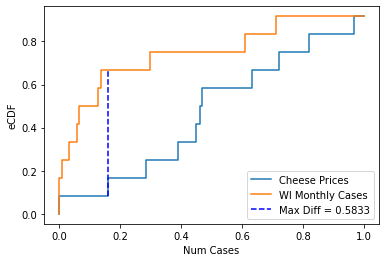


MOZZARELLA 5-6 POUNDS


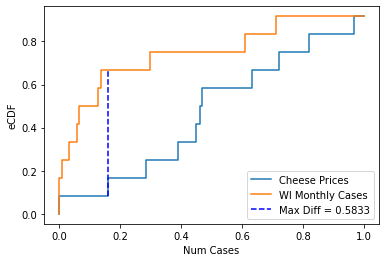


SWISS 6-9 POUND CUTS


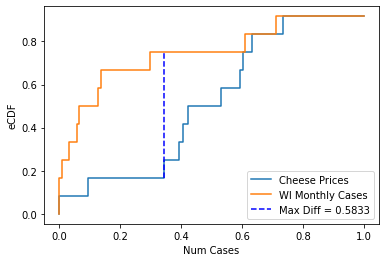

In [ ]:
def plot_ecdf(S, label):
    x = np.sort(S)
    y = np.arange(len(x))/float(len(x))
    plt.step(x, y, label=label)
    return x, y

def ks_2_sample(X, Y):
    # f = plt.figure(i)
    x1, y1 = plot_ecdf(X, 'Cheese Prices')
    x2, y2 = plot_ecdf(Y, 'WI Monthly Cases')

    data_all = np.concatenate([x1, x2])
    # using searchsorted solves equal data problem
    n1, n2 = len(x1), len(x2)
    idx1 = np.searchsorted(x1, data_all, side='right')
    idx2 = np.searchsorted(x2, data_all, side='right')
    cdf1 = idx1 / n1
    cdf2 = idx2 / n2
    cddiffs = cdf1 - cdf2
    minS = np.clip(-np.min(cddiffs), 0, 1)
    maxS = np.max(cddiffs)
    if minS > maxS:
        val = minS
        idx = np.argmin(cddiffs)
    else:
        val = maxS
        idx = np.argmax(cddiffs)
    maxdiff_x = x1[idx1[idx]]
    plt.plot((maxdiff_x,maxdiff_x),(y1[idx1[idx]],y2[idx2[idx]]), 'b--', label='Max Diff = {:.4f}'.format(val))
    plt.legend()
    plt.xlabel('Num Cases')
    plt.ylabel('eCDF')
    plt.show()

df = pd.read_csv('US_confirmed.csv')
wi_data = df.loc[48][1:].diff().fillna(0)

wi_data = wi_data[(wi_data.index >= '2020-01-22') & (wi_data.index <= '2020-12-31')]
wi_data = wi_data.drop(['2020-09-15', '2020-10-17', '2020-10-18', '2020-11-23', '2020-12-27'])
# 2020-09-15        0
# 2020-10-17        0
# 2020-10-18        0
# 2020-11-23    -4742
# 2020-12-27   -18439
wi_data.index = pd.to_datetime(wi_data.index, format='%Y-%m-%d')

wi_months_data = wi_data.groupby(wi_data.index.month).sum()
# print(wi_months_data)

wi_cheese_data = pd.read_csv('Wisconsin_Cheese_Prices.csv')
# print(wi_cheese_data)
cheese_names = list(wi_cheese_data['WISCONSIN'])

def test_correlation(idx):
    cheese_price = np.array(wi_cheese_data.loc[idx][1:-1])
    # print(cheese_price)
    print(stats.pearsonr(cheese_price, wi_months_data)[0])

for i in range(7):
    print(cheese_names[i])
    test_correlation(i)
    print()

def test_cheese(idx):
    scaler = MinMaxScaler()
    wi_cases = np.sort(np.array(wi_months_data))
    wi_normalized = scaler.fit_transform(wi_cases.reshape(-1,1)).reshape(1,-1).flatten()
    cheese_price = np.sort(np.array(wi_cheese_data.loc[idx][1:-1]))
    cheese_normalized = scaler.fit_transform(cheese_price.reshape(-1,1)).reshape(1,-1).flatten()
    # print(cheese_normalized)
    ks_2_sample(cheese_normalized, wi_normalized)

for i in range(7):
    print(cheese_names[i])
    test_cheese(i)
    print()


We find that across all the cheeses, the correlation ranged from 0.27 to 0.43. Since all of these values fall below 0.5, we claim that cheese prices are not correlated with COVID confirmed cases in Wisconsin.

Additionally, all of the KS differences were 0.5833 > 0.2604 (found by lookup table). Thus, we reject the null and claim that the distibution of various cheese prices from January-December 2020 is not the same as the distribution of monthly Wisconsin COVID 19 cases from January-December 2020.

We feel that this is due to numerous factors as there are arguments for both the increase and decrease of cheese prices when compared to COVID cases. In one sense, there should be a decrease of cheese prices due to overall lower consumer demand since people are not going out as much. However, cheese can be a product that can be stored for long periods of time, and will always have demand in certain industries that remained active during COVID times (ex. food takeout/delivery such as pizza). It is difficult to balance all of these factors and thus, this can contribute to a lack of correlation between cheese prices and COVID cases.